In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Noise Free Case

$x$: $D$ dimensional input instance

$X$: $N \times D$ dimensional input matrix for training

$f = f(X)$ $N$ dimensional vector that consists training outputs 

$X_{*}$: $N_{*} \times D$ dimensional input matrix for test

$f_{*} = f(X_{*})$

$
\left[
\begin{array}{c}
f \\
f_{*}
\end{array}
\right]
\Bigg\vert
X,X_{*}
\sim
N\left( \begin{bmatrix}
        \mu  \\
        \mu_{*}
    \end{bmatrix}, \begin{bmatrix}
        K & K_{*} \\
        K_{*}^T & K_{**}
    \end{bmatrix} \right)
$

where

$
\mu = m(X), \mu_{*} = m(X_{*}), K = K(X,X), K_{*} = K(X,X_{*}), K_{**} = K(X_{*},X_{*})
$

Apply the rules for conditioning multivariate Gaussian

$
f_{*} \vert f,X,X_{*} \sim N(\mu_{*}+K_{*}^{T}K^{-1}(f-\mu),K_{**}-K_{*}^{T}K^{-1}K_{*})
$

### Squared Exponential Kernel

$
k_{se}(x,x^{'}) = \sigma^{2}exp(-\frac{1}{2l^{2}}(x-x^{'})^{T}(x-x^{'}))
$

## Code for Noise Free Case(0 mean prior)

In [2]:
# Squared Exponential Kernel
def kernel(X1,X2,s,tau):
    N1 = len(X1)
    N2 = len(X2)
    X = np.zeros((N1,N2))
    for i in range(N1):
        for j in range(N2):
            x = X1[i,:]-X2[j,:]
            X[i,j] = np.dot(x,x.T)
    return s*s*np.exp(-1.0*X/(2*tau*tau))

In [3]:
print kernel(np.array([[2],[3]]),np.array([[2],[3]]),1,1)
print kernel(np.array([[2],[3]]),np.array([[-2],[-3]]),1,1)

[[ 1.          0.60653066]
 [ 0.60653066  1.        ]]
[[  3.35462628e-04   3.72665317e-06]
 [  3.72665317e-06   1.52299797e-08]]


In [5]:
# Test data
N = 50
Xtest = np.linspace(-5, 5, N).reshape(-1,1)
print Xtest

[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]


In [6]:
#Compute the Kernel matrix for test points
param = 0.1**0.5
K_ss = kernel(Xtest, Xtest, 1, param)
print K_ss

[[  1.00000000e+000   8.12006800e-001   4.34749074e-001 ...,
    1.64931306e-200   4.22154484e-209   7.12457641e-218]
 [  8.12006800e-001   1.00000000e+000   8.12006800e-001 ...,
    4.24868097e-192   1.64931306e-200   4.22154484e-209]
 [  4.34749074e-001   8.12006800e-001   1.00000000e+000 ...,
    7.21646448e-184   4.24868097e-192   1.64931306e-200]
 ..., 
 [  1.64931306e-200   4.24868097e-192   7.21646448e-184 ...,
    1.00000000e+000   8.12006800e-001   4.34749074e-001]
 [  4.22154484e-209   1.64931306e-200   4.24868097e-192 ...,
    8.12006800e-001   1.00000000e+000   8.12006800e-001]
 [  7.12457641e-218   4.22154484e-209   1.64931306e-200 ...,
    4.34749074e-001   8.12006800e-001   1.00000000e+000]]


Covariance function is positive semidefinite, we can apply cholesky decomposition($\Sigma = LL^{T}$). Sampling from Normal distribution => $y \sim N(\mu,\Sigma)$ equals to $y = \mu + Lu$ where $u \sim N(0,I)$ 

In [7]:
# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(N))

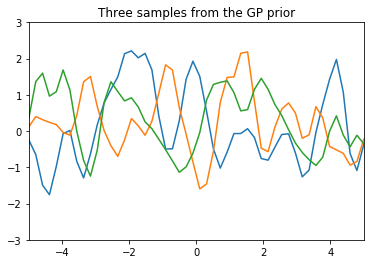

In [8]:
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(N,3)))

# Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

In [9]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ftrain = np.sin(Xtrain)

In [10]:
# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, 1, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

$
\mu_{*} + K_{*}^{T}K^{-1}(f-\mu) = \mu_{*} + K_{*}^{T}(LL^{T})^{-1}(f-\mu) = \mu_{*} + K_{*}^{T}(L^{-1})^{T}L^{-1}(f-\mu)
\\
\mu_{*} + (L^{-1}K_{*})^{T}L^{-1}(f-\mu)
$

In [11]:
# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, 1,param)
Lk = np.linalg.solve(L, K_s) #inv(L)K_s
mu = np.dot(Lk.T, np.linalg.solve(L, ftrain)).reshape((N,)) #zero mean

$
K_{**}-K_{*}^{T}K^{-1}K_{*} = K_{**}-K_{*}^{T}(LL^{T})^{-1}K_{*} = K_{**}-(L^{-1}K_{*})^{T}L^{-1}K_{*}
$

In [12]:
# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [13]:
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(N) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(N,3)))

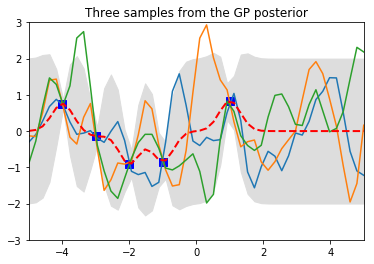

In [14]:
plt.plot(Xtrain, ftrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()

# Noisy Case

$
y_{i} = f_{i} + \epsilon{i}
$
where
$\epsilon_{i} \sim N(0,\sigma_{y}^{2})$

$
\left[
\begin{array}{c}
y \\
f_{*}
\end{array}
\right]
\Bigg\vert
X,X_{*}
\sim
N\left( \begin{bmatrix}
        \mu  \\
        \mu_{*}
    \end{bmatrix}, \begin{bmatrix}
        K+\sigma_{y}^{2}I & K_{*} \\
        K_{*}^T & K_{**}
    \end{bmatrix} \right)
$

$
f_{*} \vert y,X,X_{*} \sim N(\mu_{*}+K_{*}^{T}(K+\sigma_{y}^{2})^{-1}(y-\mu),K_{**}-K_{*}^{T}(K+\sigma_{y}^{2})^{-1}K_{*})
$

## Code for Noisy Case (0 Mean prior)

In [30]:
# Apply the kernel function to our training points
sigma_y = 0.3
K = kernel(Xtrain, Xtrain, 1, param)
K = K + sigma_y*sigma_y*np.eye(len(K))
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

In [31]:
# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, 1,param)
Lk = np.linalg.solve(L, K_s) #inv(L)K_s
mu = np.dot(Lk.T, np.linalg.solve(L, ftrain)).reshape((N,)) #zero mean

In [32]:
# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [33]:
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(N) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(N,3)))

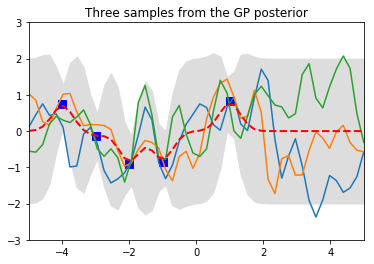

In [34]:
plt.plot(Xtrain, ftrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()